In [1]:
try:
    import geopandas
except ImportError as e:
    !pip install geopandas

try:
    import matplotlib
except ImportError as e:
    !pip install matplotlib

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib 
from matplotlib import pyplot as plt

In [6]:
PROJECT_BASE_DIR = "../data/"

### Characterize the Wikipedia Monuments database

https://heritage.toolforge.org

In [8]:
monuments = pd.read_csv(PROJECT_BASE_DIR+"monuments_all_table.csv.bz2", error_bad_lines=False, warn_bad_lines=False)

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3,6,7,8,12,13,14,15,17,18,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
import matplotlib.pyplot as plt

attrs = ["page_id", "img_name", "img_timestamp"]

def is_valid_lon(value):
    return isinstance(value, float) and value>=-180 and value<=180

def is_valid_lat(value):
    return isinstance(value, float) and value>=-90 and value<=90

In [25]:
def plot_wlm_spatial_distribution(data):
    if isinstance(data, gpd.GeoDataFrame):
        f, ax = plt.subplots(figsize=(12,12), dpi=150)
        ax.axis('off')
        data.plot(ax = ax, markersize=0.2)

In [15]:
geolocated_monuments = monuments[monuments.apply(lambda x: is_valid_lon(x.lon) and is_valid_lat(x.lat), axis=1)]

In [23]:
geolocated_monuments = gpd.GeoDataFrame(geolocated_monuments, 
                                        geometry=gpd.points_from_xy(
                                            geolocated_monuments.lon, 
                                            geolocated_monuments.lat)
                                       )

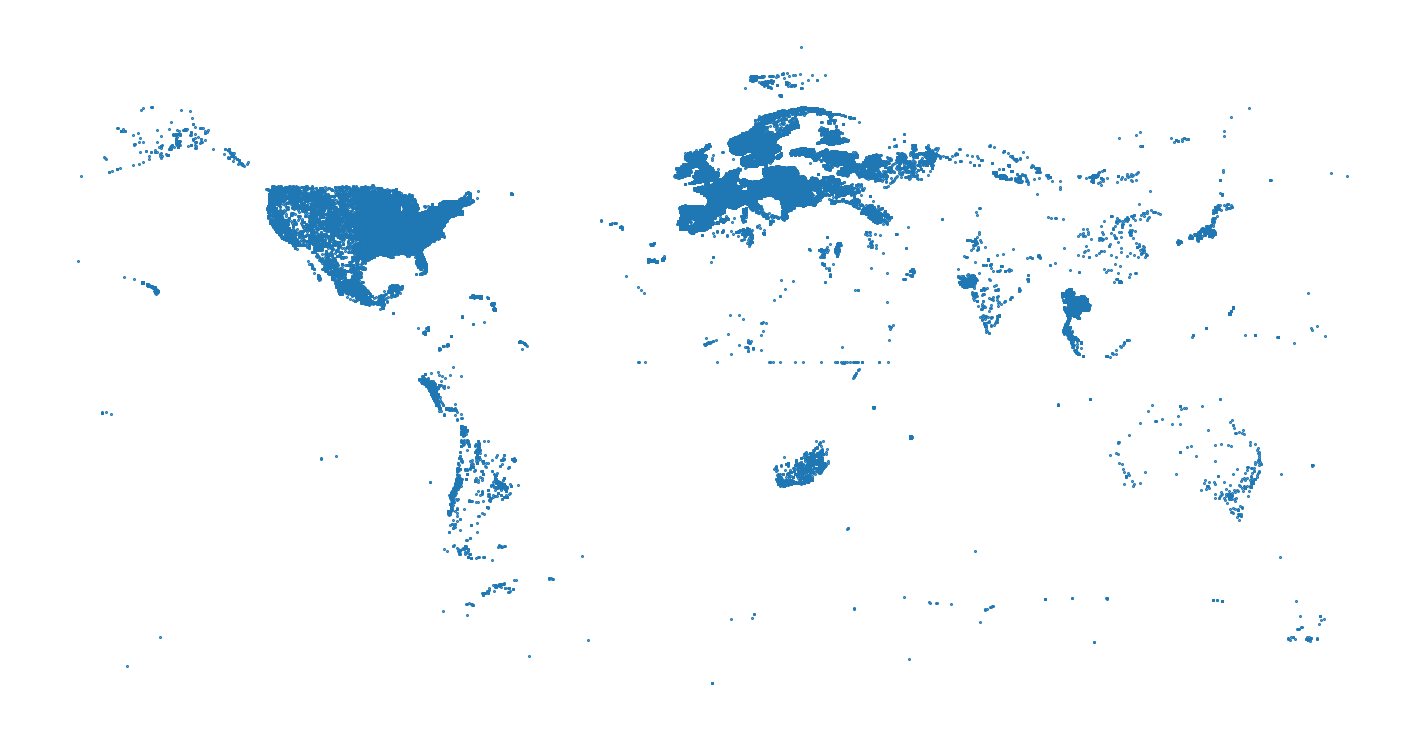

In [26]:
plot_wlm_spatial_distribution(geolocated_monuments)

**Count monuments per country**

In [30]:
geolocated_monuments.groupby(by='country').id.count() \
            .reset_index(name='count') \
            .sort_values(['count'], ascending=False) 

,country,count
67,se-fornmin,135381
10,be-vlg,130609
20,de-by,107650
73,us,90472
54,nl,62461
...,...,...
75,uy,6
77,xk,4
69,sv,3
9,be-bru,3


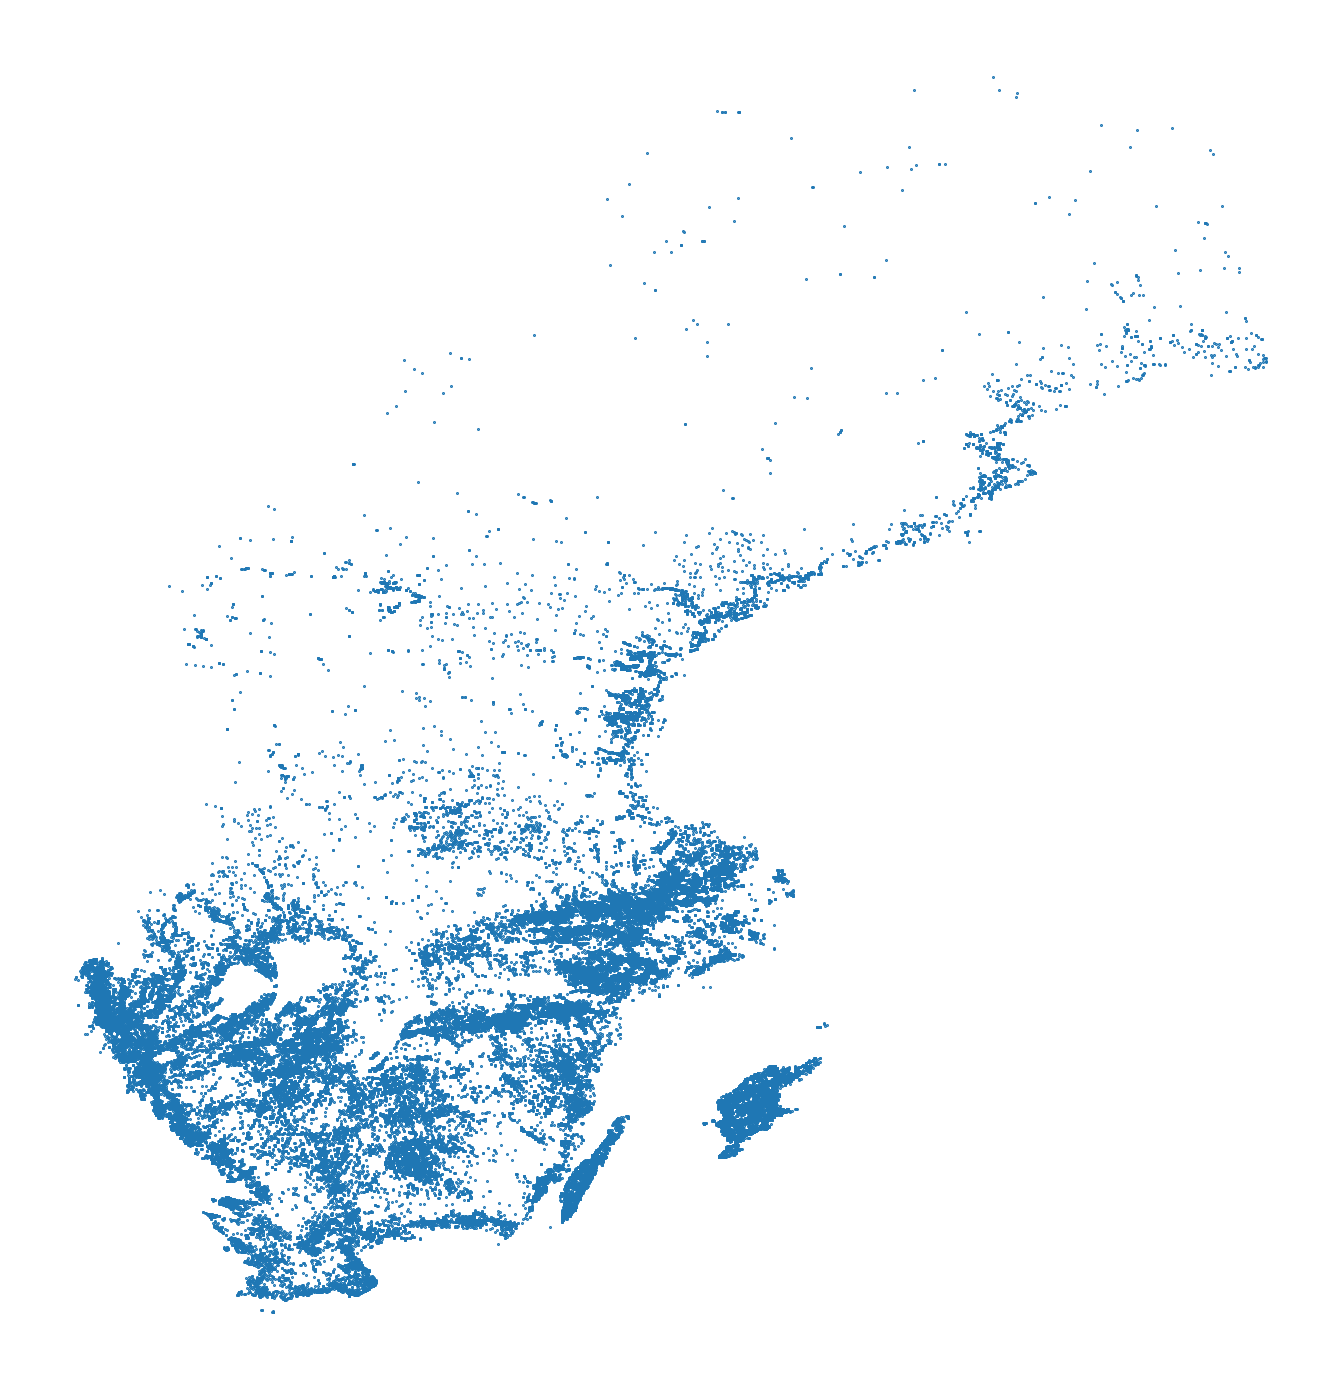

In [34]:
def filter_by_attr(df, attr, v):
    return df[df[attr]==v]
def filter_by_country(df, country):
    return filter_by_attr(df, 'country', country)
    
plot_wlm_spatial_distribution(filter_by_country(geolocated_monuments, 'se-fornmin'))

**Count monuments with a valid Wikidata entry**

In [55]:
geolocated_monuments[geolocated_monuments.wd_item.notnull()].groupby(by="country").id.count().reset_index(name='count') \
            .sort_values(['count'], ascending=False) 

,country,count
9,nl,62209
3,cz,40535
5,es,34737
4,de-he,10349
11,pt,6931
6,fr,4478
12,ru,3312
1,at,1117
2,au,516
7,gb-eng,174


**Characterize Wiki Loves Monuments snaphosts**

In [60]:
def load_wlm_snapshot(year):
    wlm = pd.read_csv(PROJECT_BASE_DIR+"wlm_data_%d.tsv.bz2" %year, sep="\t", 
                      error_bad_lines=False, 
                      warn_bad_lines=False)
    wlm = wlm[wlm.gt_lon.apply(is_valid_lon)]
    wlm = wlm[wlm.gt_lat.apply(is_valid_lat)]
    return gpd.GeoDataFrame(wlm, geometry=gpd.points_from_xy(wlm.gt_lon, wlm.gt_lat))

In [61]:
wlm = load_wlm_snapshot(2019)

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [62]:
wlm.columns.values

array(['cl_from', 'cl_to', 'cl_sortkey', 'cl_timestamp',
       'cl_sortkey_prefix', 'cl_collation', 'cl_type', 'page_id',
       'page_namespace', 'page_title', 'page_restrictions',
       'page_is_redirect', 'page_is_new', 'page_random', 'page_touched',
       'page_links_updated', 'page_latest', 'page_len',
       'page_content_model', 'page_lang', 'img_name', 'img_size',
       'img_width', 'img_height', 'img_metadata', 'img_bits',
       'img_media_type', 'img_major_mime', 'img_minor_mime',
       'img_description_id', 'img_actor', 'img_timestamp', 'img_sha1',
       'il_from', 'il_to', 'il_from_namespace', 'gt_id', 'gt_page_id',
       'gt_globe', 'gt_primary', 'gt_lat', 'gt_lon', 'gt_dim', 'gt_type',
       'gt_name', 'gt_country', 'gt_region', 'geometry'], dtype=object)

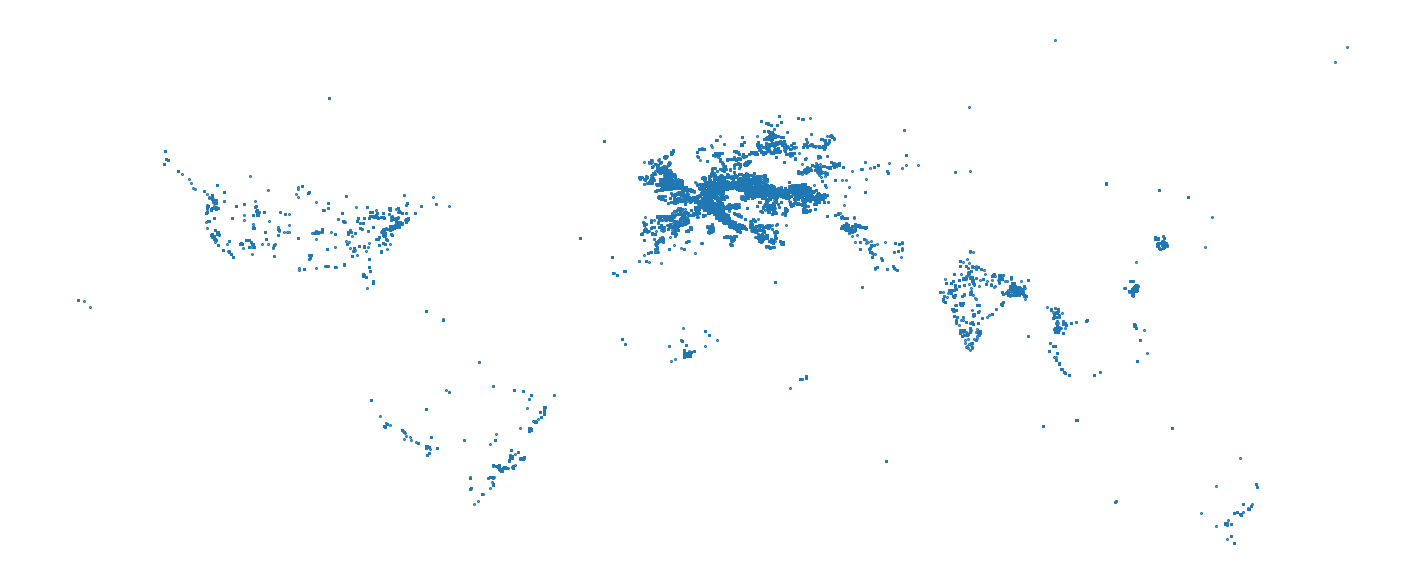

In [63]:
plot_wlm_spatial_distribution(wlm)